## 주당 기업 가치가 주당 본질 가치보다 낮을수록 저평가
## 저평가 되었을 때 주식가격이 올랐다면 좋은 결과
## 2019년 12월 기준임 
## 2020년 1월부터 주식가격 불러오기

## score: (본질가치-기업가치) / 기업가치 
## score = 본질가치가 기업가치보다 어느정도 높은지 수치화
## score값이 클수록 기업가치가 본질가치보다 낮다고 할 수 있음

In [53]:
import cjw_maria
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data  
from datetime import datetime
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

from pykrx import stock
import pandas as pd

def calRate(fromdate, todate):
    df1 = stock.get_market_ohlcv_by_ticker(str(fromdate))['종가']
    df2 = stock.get_market_ohlcv_by_ticker(str(fromdate), market='KOSDAQ')['종가']
    df3 = stock.get_market_ohlcv_by_ticker(str(fromdate), market='KONEX')['종가']
    fromdata = pd.concat([df1, df2, df3])
    fromdata = fromdata.reset_index(drop=False).rename(columns={'티커': '종목코드', '종가': str(fromdate)})
    
    df1 = stock.get_market_ohlcv_by_ticker(str(todate))['종가']
    df2 = stock.get_market_ohlcv_by_ticker(str(todate), market='KOSDAQ')['종가']
    df3 = stock.get_market_ohlcv_by_ticker(str(todate), market='KONEX')['종가']
    todata = pd.concat([df1, df2, df3])
    todata = todata.reset_index(drop=False).rename(columns={'티커': '종목코드', '종가': str(todate)})
    
    df = pd.merge(fromdata, todata, on='종목코드')
    df['rate'] = ((df[str(todate)] - df[str(fromdate)]) / df[str(fromdate)]) * 100
    return df

def getChart(fromdate, todate, code):
    fromdate = str(fromdate)
    todate = str(todate)
    
    start_date = datetime(int(fromdate[:4]),int(fromdate[4:6]),int(fromdate[6:]))
    end_date = datetime(int(todate[:4]),int(todate[4:6]),int(todate[6:]))
    # 야후에서 코스피 데이터 가져오기
    try:
        kospi_df = data.get_data_yahoo("{}.KS".format(code), start_date, end_date)
    except:
        try:
            kospi_df = data.get_data_yahoo("{}.KQ".format(code), start_date, end_date)
        except:
            return
        

    # 지수 이동평균선 데이터 구하기
    kospi_df['MA3'] = kospi_df['Close'].rolling(3).mean()
    kospi_df['MA5'] = kospi_df['Close'].rolling(5).mean()
    kospi_df['MA10'] = kospi_df['Close'].rolling(10).mean()
    kospi_df['MA20'] = kospi_df['Close'].rolling(20).mean()
    display(kospi_df.head(5))

    # 그래프 그리기
    fig, ax = plt.subplots(figsize=(10,5))

    ax.set_title(code, fontsize=15)
    ax.set_ylabel('Price')
    ax.set_xlabel("Date Time")
    ax.plot(kospi_df.index, kospi_df[['Close','MA5','MA10']])
    ax.legend(['Close','MA5','MA10'])


    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    index = kospi_df.index.astype('str') # 캔들스틱 x축이 str로 들어감

    # 이동평균선 그리기
    ax.plot(index, kospi_df['MA3'], label='MA3', linewidth=0.7)
    ax.plot(index, kospi_df['MA5'], label='MA5', linewidth=0.7)
    ax.plot(index, kospi_df['MA10'], label='MA10', linewidth=0.7)

    # X축 티커 숫자 20개로 제한
    ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

    # 그래프 title과 축 이름 지정
    ax.set_title(code, fontsize=22)
    ax.set_xlabel('Date')

    # 캔들차트 그리기
    candlestick2_ohlc(ax, kospi_df['Open'], kospi_df['High'], 
                      kospi_df['Low'], kospi_df['Close'],
                      width=0.5, colorup='r', colordown='b')
    ax.legend()
    plt.grid()
    plt.show()


maria = cjw_maria.MariaDB()

dart2019 = maria.showData('select * from dart2019')

dart2019['score'] = (dart2019['본질가치'] - dart2019['기업가치']) / dart2019['기업가치']

dart2019[['종목코드', 'score']].sort_values('score', ascending=False)

,종목코드,score
740,088130,23.581978
346,027410,19.543040
1061,900250,17.641610
443,038540,12.776326
474,042420,12.682577
...,...,...
365,031310,-13.164926
1017,220180,-17.692284
222,010470,-21.070744
1064,900300,-21.293457


In [54]:
dart2019

,종목코드,재무제표,자산총계,부채총계,자본총계,현금성자산,유동자산,유동부채,매출액,영업이익,...,EPS2018,EPS,주식가격,순자산가치,순손익가치,본질가치,보충적가치,기업가치,기업분석,score
0,000020,연결,3760.0,752.0,3009.0,378.0,2355.0,557.0,3072.0,99.0,...,361.599,336.5380,8140.0,10579.500,5692.50,7647.290,8624.680,6786.690,7216.990,0.126807
1,000040,연결,1441.0,1089.0,352.0,158.0,527.0,864.0,1326.0,-247.0,...,-189.174,-216.4230,273.0,164.165,-1991.55,-1129.270,-698.123,468.308,-330.479,-3.411383
2,000050,연결,13707.0,6292.0,7416.0,130.0,2649.0,1924.0,3439.0,320.0,...,736.816,1590.3500,9410.0,26452.400,11945.90,17748.500,20649.800,18828.100,18288.300,-0.057340
3,000080,연결,32709.0,22377.0,10332.0,1442.0,7823.0,13589.0,20351.0,882.0,...,317.965,-604.5600,28750.0,12239.500,-1661.12,3899.130,6679.250,31203.900,17551.500,-0.875044
4,000100,연결,21172.0,4672.0,16500.0,2742.0,11170.0,3522.0,14804.0,125.0,...,4775.030,2864.5000,236500.0,126891.000,45897.40,78294.800,94493.500,219681.000,148988.000,-0.643598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,900250,연결,2988.0,337.0,2650.0,1096.0,1452.0,296.0,846.0,285.0,...,371.770,333.4130,1740.0,3905.060,3604.59,3724.780,3784.870,199.810,1962.300,17.641610
1062,900260,연결,3314.0,744.0,2569.0,1549.0,2769.0,740.0,977.0,44.0,...,139.897,19.7487,458.0,1811.950,1117.68,1395.380,1534.240,-317.843,538.771,-5.390155
1063,900280,연결,2319.0,156.0,2163.0,1009.0,1472.0,154.0,1131.0,295.0,...,226.981,136.6670,335.0,1362.260,2508.17,2049.810,1820.630,-240.009,904.899,-9.540555
1064,900300,연결,3021.0,255.0,2766.0,1028.0,2229.0,240.0,2996.0,459.0,...,774.704,558.6300,1440.0,4859.020,6640.32,5927.800,5571.540,-292.104,2817.850,-21.293457


In [19]:
ratedf = pd.merge(dart2019[['종목코드', 'score']].sort_values('score', ascending=False), calRate(20191227, 20200106), on='종목코드')
ratedf

,종목코드,score,20191227,20200106,rate
0,088130,23.581978,8080,7960,-1.485149
1,027410,19.543040,5600,5370,-4.107143
2,900250,17.641610,1740,1740,0.000000
3,038540,12.776326,8710,8270,-5.051665
4,042420,12.682577,14100,14900,5.673759
...,...,...,...,...,...
1061,031310,-13.164926,3190,3240,1.567398
1062,220180,-17.692284,2010,1980,-1.492537
1063,010470,-21.070744,4980,4985,0.100402
1064,900300,-21.293457,1440,1300,-9.722222


,High,Low,Open,Close,Volume,Adj Close,MA3,MA5,MA10,MA20
Date,,,,,,,,,,
2019-12-27,56900.0,55500.0,55700.0,56500.0,12313056.0,54013.425781,NaN,NaN,NaN,NaN
2019-12-30,56600.0,55700.0,56200.0,55800.0,8356767.0,53344.234375,NaN,NaN,NaN,NaN
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,52770.640625,55833.333333,NaN,NaN,NaN
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,53057.433594,55500.000000,NaN,NaN,NaN
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,53057.433594,55400.000000,55700.0,NaN,NaN


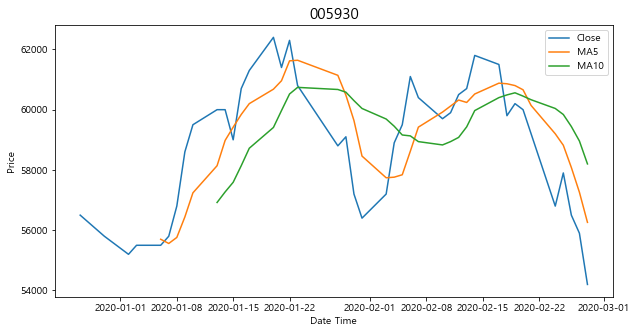

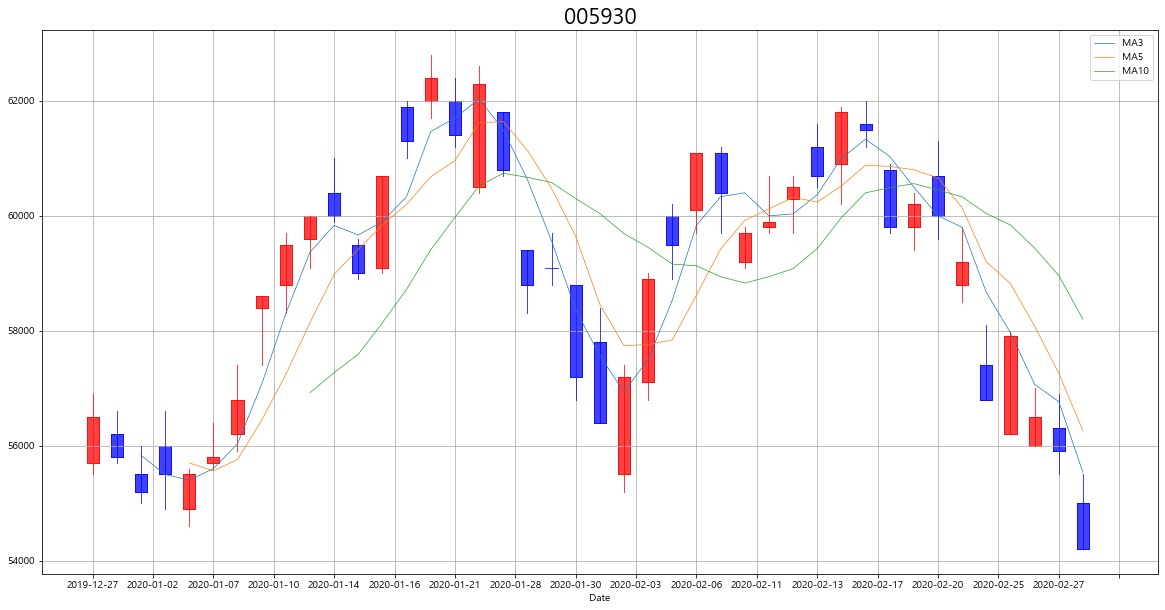

In [48]:
getChart(20191227, 20200301, '005930')